# Bivariate Exploration of Data
---

## Scatterplots and Correlation
A **scatterplot** is used to show the relationship between *two quantitative variables*. The two variables are indicated on X and Y-axis, respectively. 

To quantify how strong the correlation is between the variables, we use a **correlation coefficient**. **Pearson correlation coefficient (r)** captures linear relationships. It is a value ranging from -1 to +1. A positive value of r indicates the increase in one variable tends to increase another variable. On the other hand, a negative r means the increase in one variable tends to cause a decrease in another variable. A value close to 0 indicates a weak correlation, and a value close to -1 and +1 indicates a strong correlation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('support-files/04_Bivariate/fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


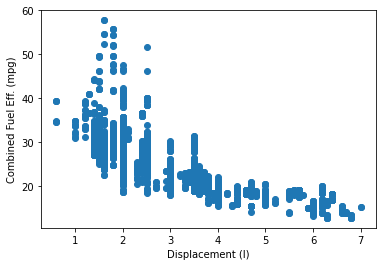

In [3]:
# the plot suggests a generally negative correlation 
# between engine size and fuel efficiency
plt.scatter(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

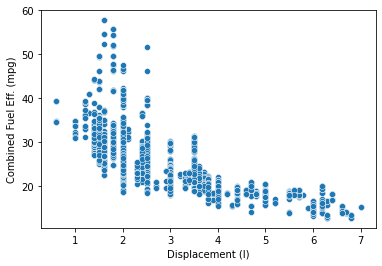

In [4]:
# using seaborn
sns.scatterplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

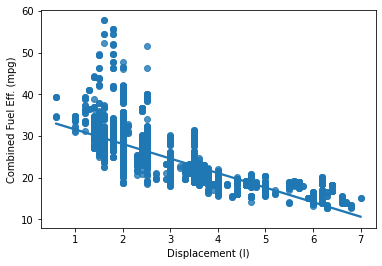

In [5]:
# seaborn's regplot combines the scatterplot
# with the fitting of a regression line to the data

# looking at the line, we can see that cars with lower displacements,
# and higher efficiency bring up the left side of the line
sns.regplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Overplotting, Transparency and Jitter
If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from *overplotting*, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

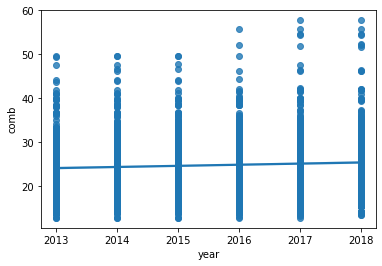

In [6]:
# the regression line that got fit suggests a slight
# upward trend in efficiency, but that's not clear from
# the data
sns.regplot(data=fuel_econ, x='year', y='comb');

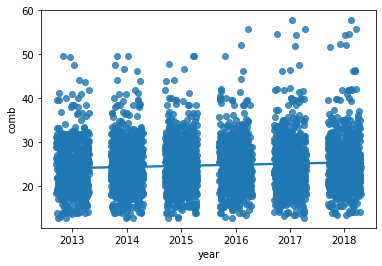

In [7]:
# this is a good opportunity to make use of jitter
# this is till not enough to see the points below the
# mid 30s
sns.regplot(data=fuel_econ, x='year', y='comb', x_jitter=0.3);

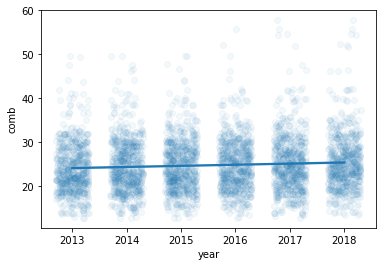

In [8]:
# now, we add some transparency
sns.regplot(data=fuel_econ, x='year', y='comb',
           x_jitter=0.3, scatter_kws={'alpha': 1/20});

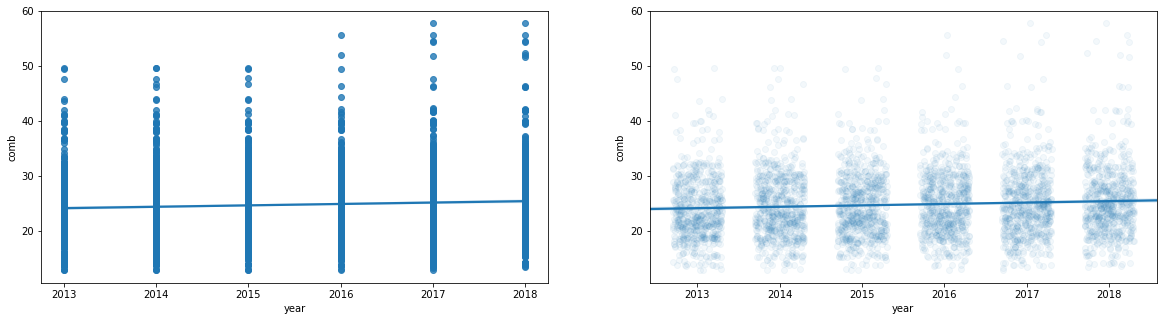

In [9]:
# pratice adding the two charts side-by-side
fig, axes = plt.subplots(1, 2, figsize=[20,5])

# plot 1: simple scatter 
sns.regplot(ax=axes[0], data=fuel_econ, x='year', y='comb')

# plot 2: scatter with transparency and jitter
sns.regplot(ax=axes[1], data=fuel_econ, x='year', y='comb',
           x_jitter=0.3, scatter_kws={'alpha': 1/20}, 
           truncate=False);

## Heat Maps
Heat maps for *quantitative variable* vs. *quantitative variable*. It's a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color.

They're good for:
- Discrete variable vs. discrete variable
- Good alternative to transparency for a lot of data
- Bin sizes are important! Too large a bin size, and you may fail to see the major trends in the data, and with too smaller bin size, you may end up distracted by noise.

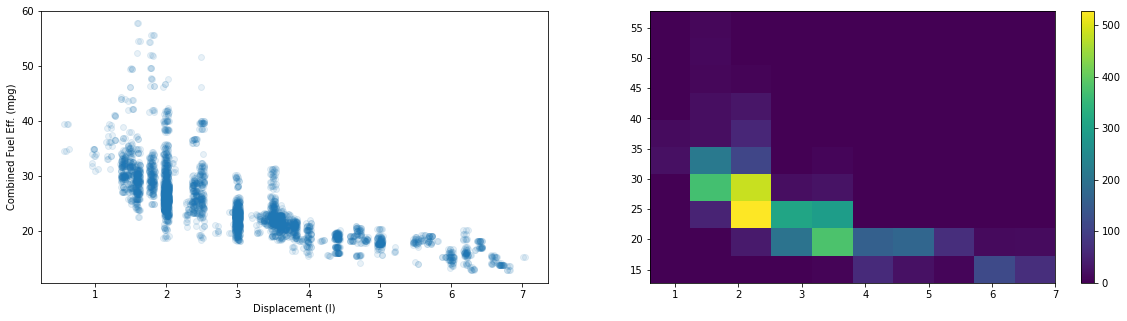

In [10]:
# coming back to the relationship between engine size (displacement) and combined fuel efficiency
# plotting a scatter and a heat map side-by-side

# size
plt.figure(figsize=[20,5])

# plot 1: scatter
plt.subplot(1, 2, 1)
sns.regplot(data=fuel_econ, x='displ', y='comb',
          x_jitter=0.04, scatter_kws={'alpha': 1/10},
          fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# plot 2: heat map
plt.subplot(1, 2, 2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
# legend associating the counts to colors will be placed
# adjacent to the plot
plt.colorbar();

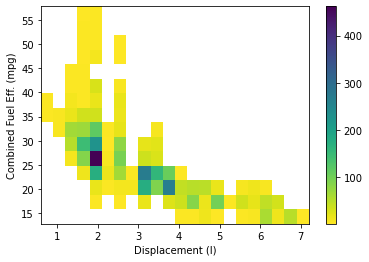

In [11]:
# improving the heat map above
# first, let set a minimum bound of counts
# before a rectangular area can be plotted
# by setting cmin=0.5, any bin with no counts
# will return as NaN and not get colored in

# since now white represents zero, a reverse
# color palette is better, in which darker colors
# are associated with higher values
# '_r' in cmap means reversed color map

# finally, let's choose the bins looking at the
# descriptive statistics below
bins_x = np.arange(fuel_econ['displ'].min(), fuel_econ['displ'].max()+0.3, 0.3)
bins_y = np.arange(fuel_econ['comb'].min(), fuel_econ['comb'].max()+3, 3)

# now, we can see from the plot two areas of high frequency in
# the middle of the negative trend between fuel efficiency and engine size
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, 
          cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [12]:
# bin sizes of 0.3 for displ and 3 for fuel efficiency
# seem like a good idea
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


#### Add text annotation on each cell using [`pyplot.text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) function

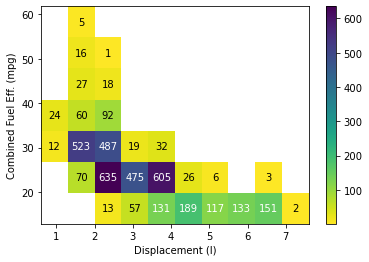

In [13]:
# specify bin edges
bins_x = np.arange(fuel_econ['displ'].min(), fuel_econ['displ'].max()+0.7, 0.7)
bins_y = np.arange(fuel_econ['comb'].min(), fuel_econ['comb'].max()+7, 7)

# use cmin to set a minimum bound of counts
# use cmap to reverse the color map
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
                cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# select the bi-dimensional histogram, a 2d array of samples x and y
# values in x are histogrammed along the first dimension and
# values in y are histogrammed along the second dimension
counts = h2d[0]

# add text annotation on each cell
# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                    ha='center', va='center', color='black')

## Scatterplot Practice
#### **TO DO 1**: 
Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). **Use a _scatter plot_ to depict the data.**
1. What is the general relationship between these variables? 
2. Are there any points that appear unusual against these trends?

In [14]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


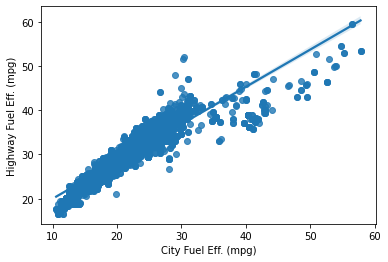

In [15]:
# the relationship between both variables is positive
sns.regplot(data=fuel_econ, x='city', y='highway')
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

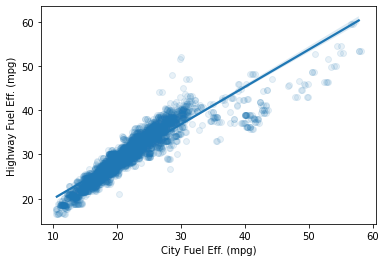

In [16]:
# adding some jitter and transparency
sns.regplot(data=fuel_econ, x='city', y='highway',
           x_jitter=0.4, scatter_kws={'alpha': 0.1})
# plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Interestingly, for most cars, highway mileage is clearly higher than city mileage, but for those cars with city mileage above 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend.  It might be good to call out this trend by adding a diagonal line to the figure using the `plot` function.

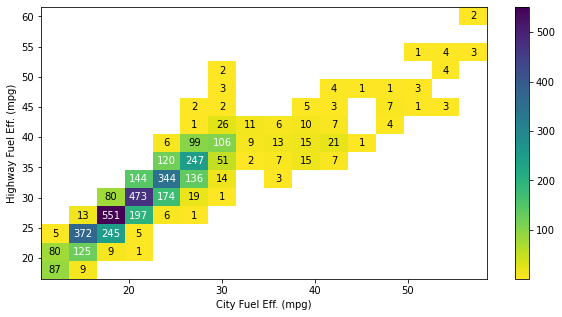

In [17]:
# now, let's use a heatmap for these two variables
bins_x = np.arange(fuel_econ['city'].min(), fuel_econ['city'].max()+3, 3)
bins_y = np.arange(fuel_econ['highway'].min(), fuel_econ['highway'].max()+3, 3)
plt.figure(figsize=[10,5])
h2d = plt.hist2d(data=fuel_econ, x='city', y='highway',
          cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100:
            plt.text(bins_x[i]+1.5, bins_y[j]+1.5, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+1.5, bins_y[j]+1.5, int(c),
                    ha='center', va='center', color='black')

In [18]:
fuel_econ[['city', 'highway']].describe()

,city,highway
count,3929.000000,3929.000000
mean,21.830462,29.973842
std,6.246273,5.747571
min,10.540200,16.559400
25%,17.746900,25.754200
50%,20.823200,29.633800
75%,24.981400,33.773100
max,57.808800,59.416900


#### **TO DO 2**: 
Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The `displ` variable has the former (in liters), while the `co2` variable has the latter (in grams per mile). **Use a heat map to depict the data.** How strong is this trend?

In [19]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


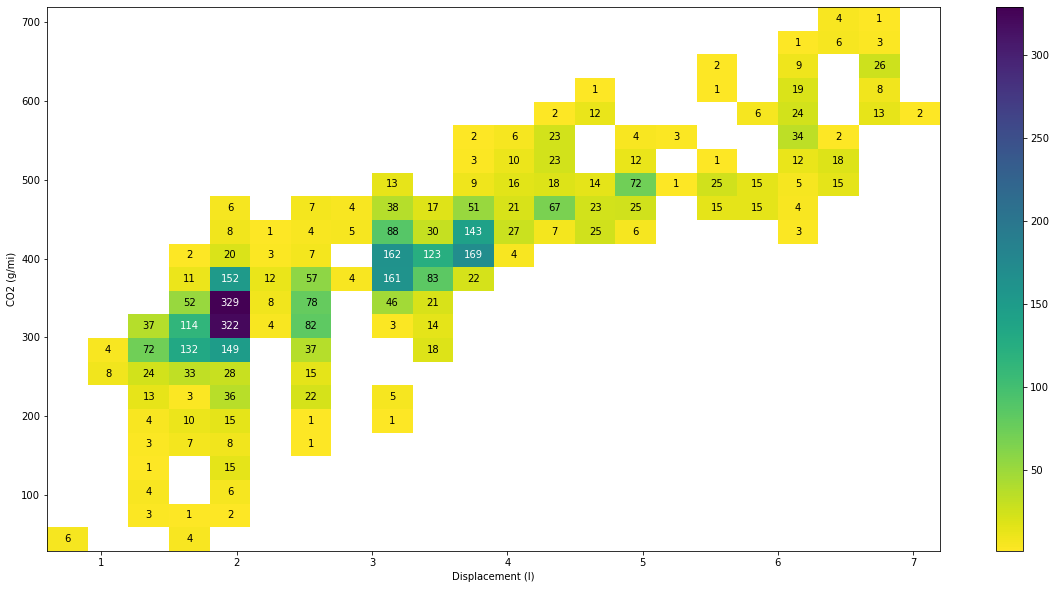

In [20]:
bins_x = np.arange(fuel_econ['displ'].min(), fuel_econ['displ'].max()+0.3, 0.3)
bins_y = np.arange(fuel_econ['co2'].min(), fuel_econ['co2'].max()+30, 30)
plt.figure(figsize=[20,10])
h2d = plt.hist2d(data=fuel_econ, x='displ', y='co2', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y])
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)')
plt.colorbar();

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100:
            plt.text(bins_x[i]+0.15, bins_y[j]+15, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+0.15, bins_y[j]+15, int(c),
                    ha='center', va='center', color='black')

In [21]:
fuel_econ[['displ', 'co2']].describe()

,displ,co2
count,3929.000000,3929.000000
mean,2.950573,376.564266
std,1.305901,92.338892
min,0.600000,29.000000
25%,2.000000,315.000000
50%,2.500000,369.000000
75%,3.600000,429.000000
max,7.000000,692.000000


The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions.

---
## Violin Plots
There are a few ways of plotting the relationship between *one quantitative and one qualitative variable*, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram.

Seaborn's `violinplot()` [function](https://seaborn.pydata.org/generated/seaborn.violinplot.html) can be used to create violin plots.

In [22]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


In [23]:
fuel_econ['VClass'].unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [24]:
# turning the column into a categoical type putting
# the classes in order of size
# this way, the ordering is automatic and will make visualizations easier
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
v_classes = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(v_classes);

> Note: were used in this conversion: [`api.types`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html), [`CategoricalDtype`](https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html) and [`astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html).

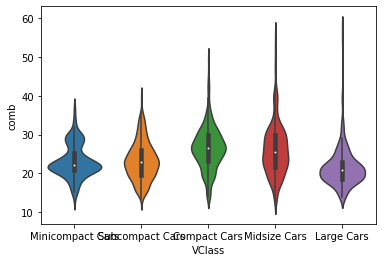

In [25]:
# using seaborn's violinplot() function
sns.violinplot(data=fuel_econ, x='VClass', y='comb');

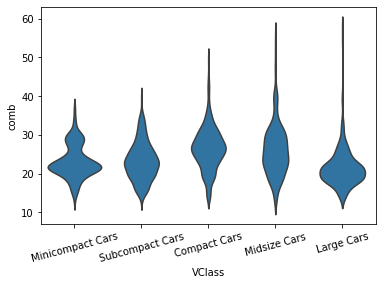

In [26]:
# improving things
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
              color=base_color, inner=None) # inner=None cleans the middle of the plots
plt.xticks(rotation=15); # rotate labels slightly

From this plot, we can see that there isn't a monotinic relationship between car size and fuel efficiency. The largest cars seem to have the lowest fuel efficiencies, but the long tail suggest outliers with the highest of efficiencies. Minicompact and subcompact have the next best efficiencies, but the distribution for mini compact cars is much more peaked. Finally, compact and midsize cars have the best efficiencies, but the distribution of the midsize cars is broader than the compacts. 

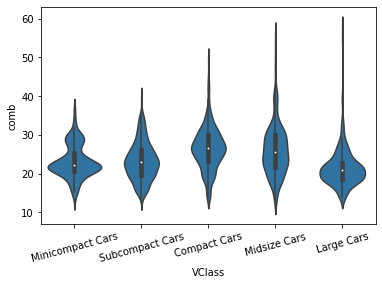

In [27]:
# including miniature box plots
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
              color=base_color) 
plt.xticks(rotation=15);

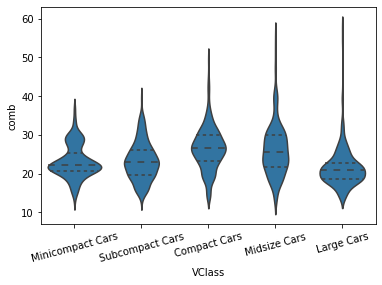

In [28]:
# another possibility for showing quartile info
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
              color=base_color, inner='quartile')
plt.xticks(rotation=15);

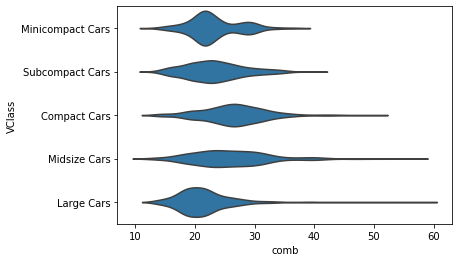

In [29]:
# variation: horizontal violin
sns.violinplot(data=fuel_econ, x='comb', y='VClass', color=base_color, inner=None);

## Box Plots
A box plot, like the violin plot, can also be used to show the relationship between *a numeric variable and a categorical variable*. In a box, the central line indicates the median, the upper and lower edges show the 1st and 3rd quartiles. Whiskers outside of the box indicate the largest and smallest values. Box plots also have outliers plotted as points.

Seaborn's `boxplot()` [function](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) can be used to create box plots.

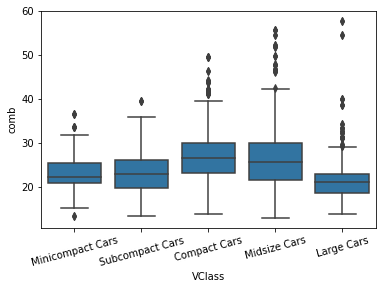

In [30]:
sns.boxplot(data=fuel_econ, x='VClass', y='comb',
           color=base_color)
plt.xticks(rotation=15);

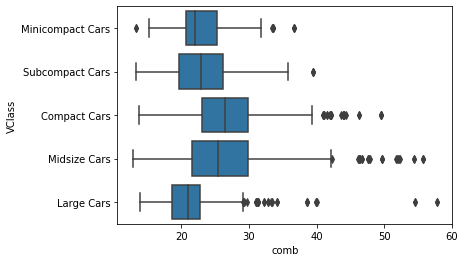

In [31]:
# horizontal box plot
sns.boxplot(data=fuel_econ, x='comb', y='VClass', color=base_color);

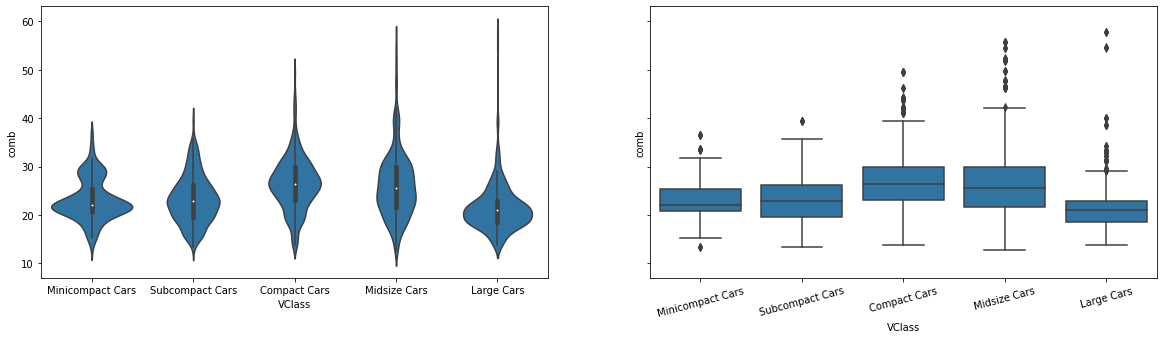

In [32]:
# pratice putting a box plot side-by-side with 
# its corresponding violin plot

# size of both plots
fig, axes = plt.subplots(1, 2, figsize=[20,5], sharey=True)

# plot 1: violin plot
sns.violinplot(ax=axes[0], data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

# plot 2: boxplot
sns.boxplot(ax=axes[1], data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the "Large Cars" group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the "Minicompact Cars" values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

### Violin and Box Plot Practice
#### **TO DO**: 
What is the relationship between the size of a car and the size of its engine? The vehicle classes can be found in the `VClass` column, while the engine sizes are in the `displ` column (in liters). 

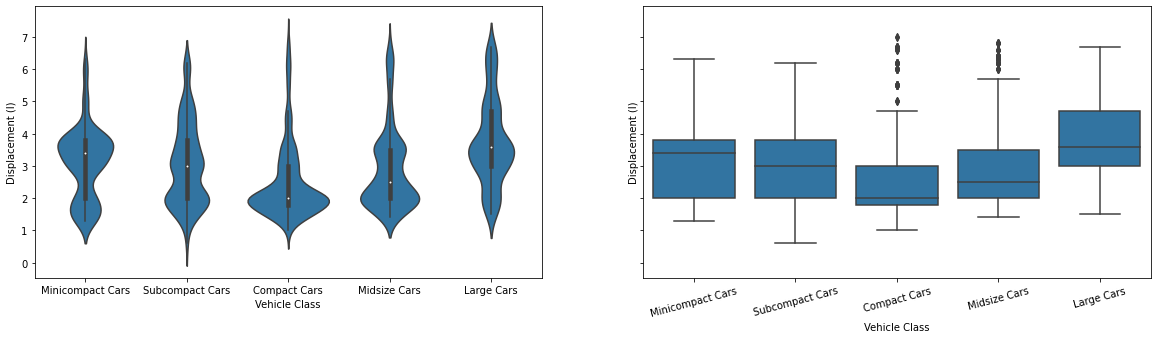

In [33]:
fig, axes = plt.subplots(1, 2, figsize=[20,5], sharey=True)

# plot 1: violin plot
sns.violinplot(ax=axes[0], data=fuel_econ, x='VClass', y='displ', color=base_color)
plt.xticks(rotation=15)
axes[0].set_xlabel('Vehicle Class')
axes[0].set_ylabel('Displacement (l)')

# plot 2: box plot
sns.boxplot(ax=axes[1], data=fuel_econ, x='VClass', y='displ', color=base_color)
plt.xticks(rotation=15);
axes[1].set_xlabel('Vehicle Class')
axes[1].set_ylabel('Displacement (l)');

One of the interesting things about the relationship between variables is that it isn't consistent. Compact cars tend to have smaller engine sizes than the minicompact and subcompact cars, even though those two vehicle sizes are smaller. The box plot makes it easier to see that the median displacement for the two smallest vehicle classes is greater than the third quartile of the compact car class.

---
## Clustered Bar Charts
We can use clustered bar charts to show the relationship between *two qualitative variables*. However, to do this, we may need to process the second variable a little so it can be shown as a quantitative value along the y-axis. For example, you can count the frequency of the second variable. Also, you may also apply a color or texture encoding to distinguish the level of the second variable.

In [34]:
fuel_econ['trans'].unique()

array(['Automatic (AM6)', 'Automatic (AM-S6)', 'Automatic (S6)',
       'Automatic 8-spd', 'Manual 6-spd', 'Automatic 6-spd',
       'Automatic (S5)', 'Automatic 7-spd', 'Automatic (AV-S6)',
       'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S7)', 'Automatic (variable gear ratios)',
       'Manual 5-spd', 'Automatic (AV-S8)', 'Automatic 4-spd',
       'Automatic 5-spd', 'Automatic (AM7)', 'Automatic (AV-S7)',
       'Automatic 9-spd', 'Automatic (AM-S8)', 'Automatic (A1)',
       'Automatic (AM8)', 'Automatic (S9)', 'Automatic (S10)',
       'Automatic (AV-S10)'], dtype=object)

In [35]:
# to simply, let's look only at the main type division: automatic or manual
# and store them in the trans_type column
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

> Note: the `sns.heatmap()` [function](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) used below. 

In [36]:
# one way to do this is with a heat map
# the heatmap() function in seaborn is specific for categorical variables
# however, the function takes as an argument a 2d-array or DF
# with the values to be depicted

# first, use groupby and size to get the number of cars
# in each combination of the two variable levels
# as panda series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [37]:
# we are going to have to convert this series
# into a dataframe
type(ct_counts)

pandas.core.series.Series

In [38]:
# use reset_index to convert from series to df
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [39]:
# using reset_index, we've successfully converted the series
# into a dataframe
type(ct_counts)

pandas.core.frame.DataFrame

In [40]:
# use pivot() to rearrange the data so that we have
# vehicle class on rows, transmission types on columns, 
# valuyes in the cells 
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


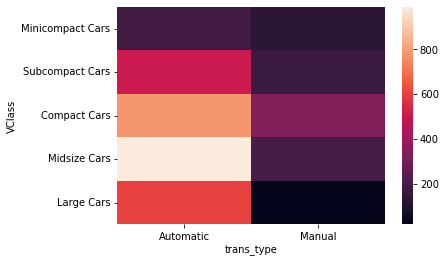

In [41]:
# now, we are ready to plot
# it's actually hard to compare counts 
# from the colors alone 
sns.heatmap(ct_counts);

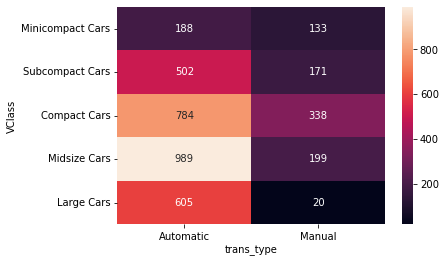

In [42]:
# add annotations
# fmt='d' means annotations will be formatted as ints
# for NaNs, fmt='.0f' is a possibility
sns.heatmap(ct_counts, annot=True, fmt='d');

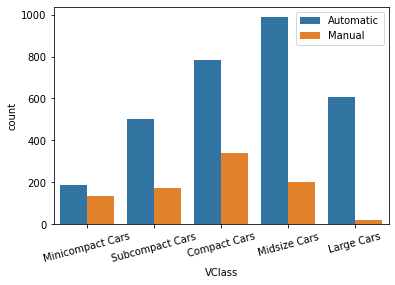

In [43]:
# an alternative way of showing the distribution
# and counts is through the use of a clustered bar chart
ax = sns.countplot(data=fuel_econ, x='VClass', hue='trans_type')
ax.legend(loc=1)
plt.xticks(rotation=15);

Using a clustered bar chart, we can see that minicompact cars have the closest ratio between automatic and manual transmissions, while large cars had the most distant ratio. 

### Categorical Plot Practice
####  **TO DO**
Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 


In [44]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic


In [45]:
fuel_econ['fuelType'].unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel',
       'Midgrade Gasoline', 'Natural Gas'], dtype=object)

In [46]:
fuel_econ['fuelType'].value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

In [47]:
gas_only = fuel_econ.query('fuelType == "Premium Gasoline" or fuelType == "Regular Gasoline"')
gas_only['fuelType'].unique()

array(['Premium Gasoline', 'Regular Gasoline'], dtype=object)

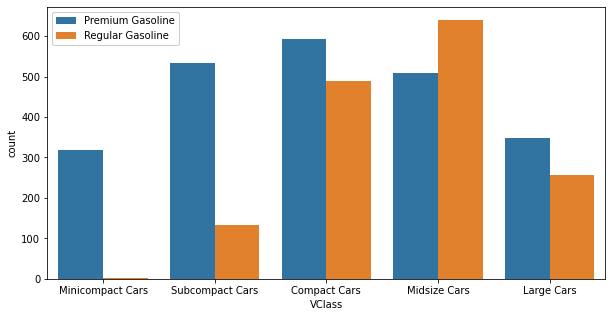

In [48]:
# using a clustered bar chart
plt.figure(figsize=[10,5])
ax = sns.countplot(data=gas_only, x='VClass', hue='fuelType')
ax.legend(loc=2, framealpha=1); # upper left, no transparency

For minicompact and subcompact cars, the recommended fuel is mainly premium gasoline. For the other vehicle classes, that difference is less pronounced. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.

In [49]:
# using a heat map
gas_counts = gas_only.groupby(['fuelType', 'VClass']).size()
gas_counts

fuelType          VClass          
Premium Gasoline  Minicompact Cars    318
                  Subcompact Cars     534
                  Compact Cars        593
                  Midsize Cars        509
                  Large Cars          348
Regular Gasoline  Minicompact Cars      3
                  Subcompact Cars     132
                  Compact Cars        490
                  Midsize Cars        640
                  Large Cars          256
dtype: int64

In [50]:
# confirming we created a series
type(gas_counts)

pandas.core.series.Series

In [51]:
# converting it to a df
gas_counts = gas_counts.reset_index(name='count')
gas_counts

,fuelType,VClass,count
0,Premium Gasoline,Minicompact Cars,318
1,Premium Gasoline,Subcompact Cars,534
2,Premium Gasoline,Compact Cars,593
3,Premium Gasoline,Midsize Cars,509
4,Premium Gasoline,Large Cars,348
5,Regular Gasoline,Minicompact Cars,3
6,Regular Gasoline,Subcompact Cars,132
7,Regular Gasoline,Compact Cars,490
8,Regular Gasoline,Midsize Cars,640
9,Regular Gasoline,Large Cars,256


In [52]:
# confirming we did it right
type(gas_counts)

pandas.core.frame.DataFrame

In [53]:
# now pivoting to generate the heatmap
gas_counts = gas_counts.pivot(index='VClass', columns='fuelType', values='count')
gas_counts

fuelType,Premium Gasoline,Regular Gasoline
VClass,,
Minicompact Cars,318,3
Subcompact Cars,534,132
Compact Cars,593,490
Midsize Cars,509,640
Large Cars,348,256


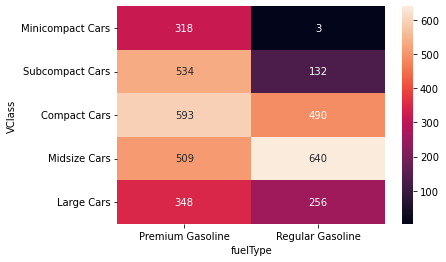

In [54]:
sns.heatmap(gas_counts, annot=True, fmt='.0f');

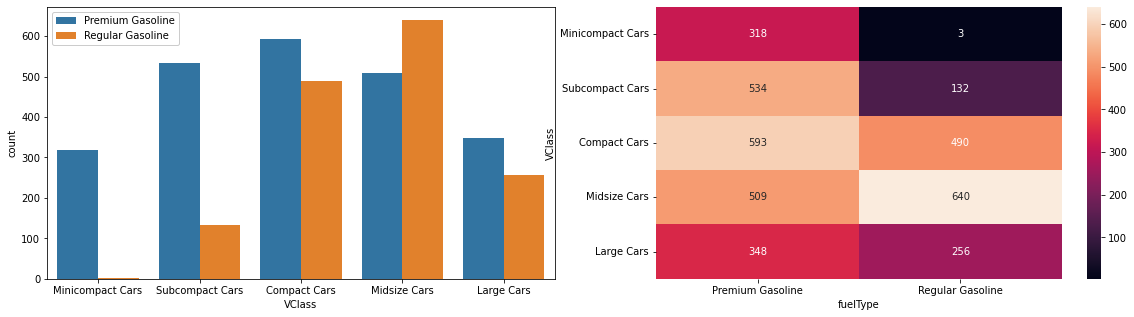

In [55]:
# practicing putting them side-by-side
fig, axes = plt.subplots(1, 2, figsize=[20,5])

# plot 1: clustered bar chart
sns.countplot(ax=axes[0], data=gas_only, x='VClass', hue='fuelType')
axes[0].legend(loc=2, framealpha=1); # upper left, no transparency

# plot 2: heat map
sns.heatmap(ax=axes[1], data=gas_counts, annot=True, fmt='.0f');

---
## Faceting
One way that you could think about a clustered bar chart is that it's really a set of side-by-side univariate bar charts on different subsets of the data. 

This technique of creating multiple copies of the same type of plot but for different subsets of data is called faceting. We can use this for any type of plot. A violin plot, for instance, can be thought of as a set of histograms faceted by a categorical variable. 

> Note: `sns.FacetGrid()` [function](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid). 

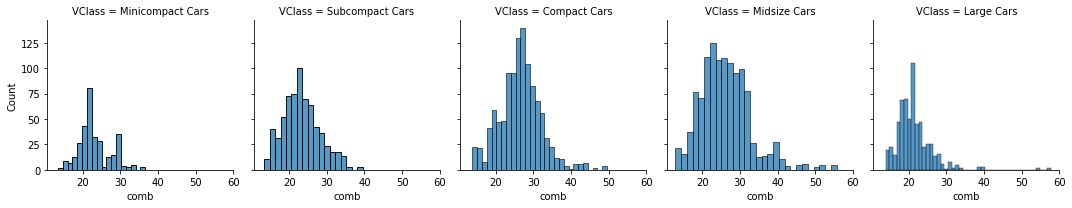

In [56]:
# what this means is that for whatever plot we facet 
# with, there'll be one of that plot made for each level of
# vehicle class 
g = sns.FacetGrid(data=fuel_econ, col='VClass');
g.map(sns.histplot, 'comb');

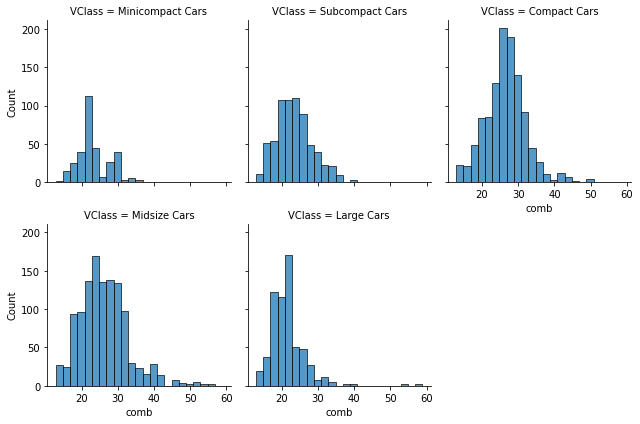

In [57]:
# improving things
bins = np.arange(fuel_econ['comb'].min(), fuel_econ['comb'].max()+2, 2)
g = sns.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3)
g.map(sns.histplot, 'comb', bins=bins);

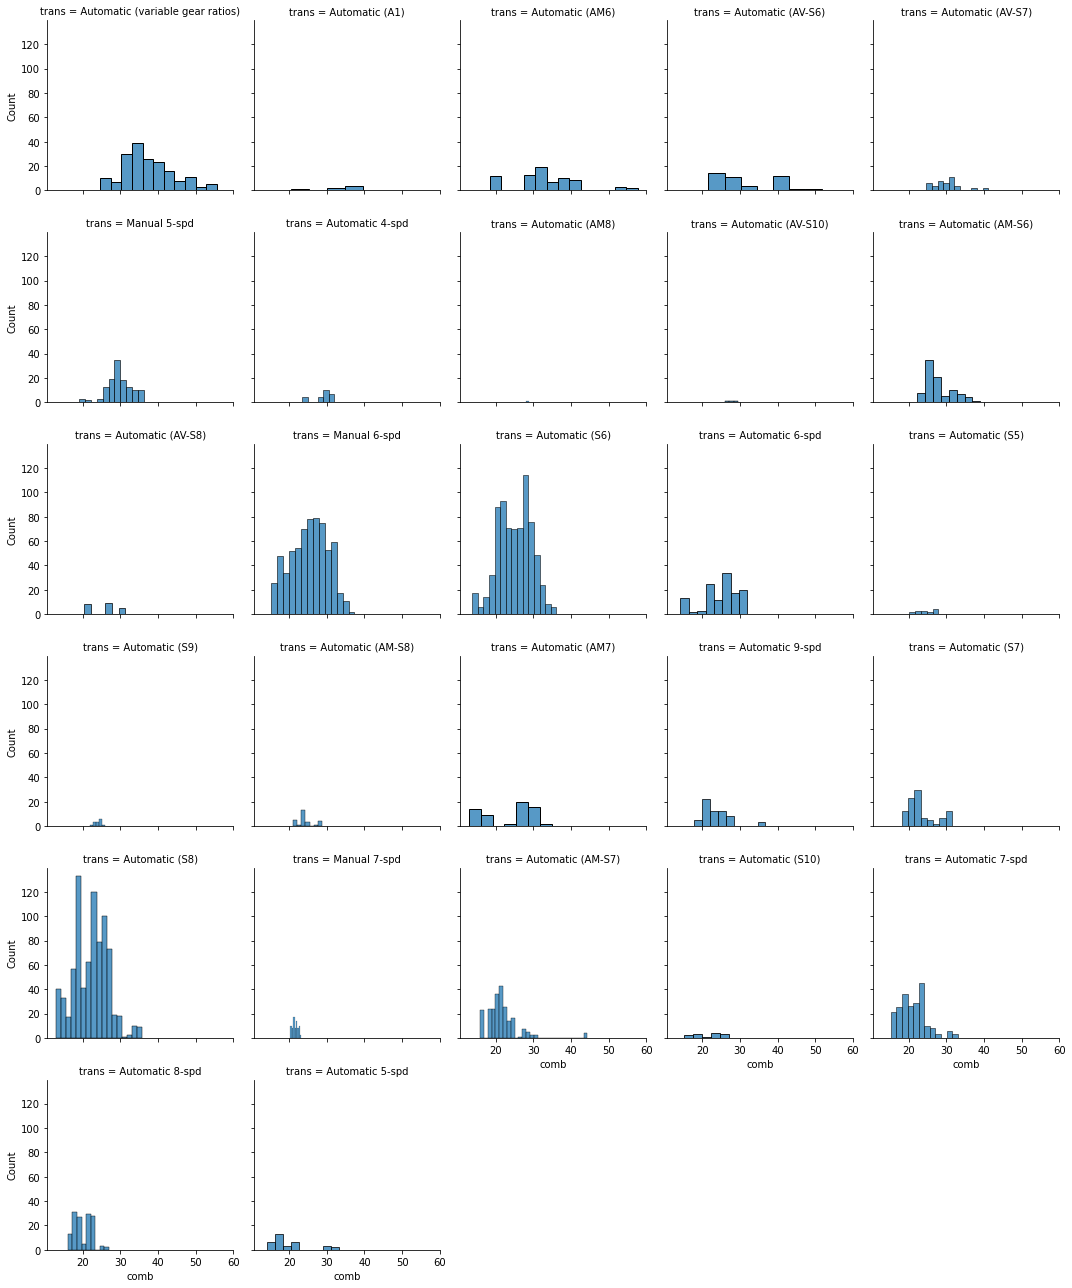

In [58]:
# another example, this time using transmission type and
# combined fuel efficiency

# find the order in which you want to display the facets
# for each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# select only the list of transmission type
# in the decresing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending=False).index

# use the argument col_order to display the facet grid
# in the desireble group_order
g = sns.FacetGrid(data=fuel_econ, col='trans', col_wrap = 5, col_order=group_order)
g.map(sns.histplot, 'comb');

## Adaptation of Univariate Plots
Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's `barplot()` [function](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot).

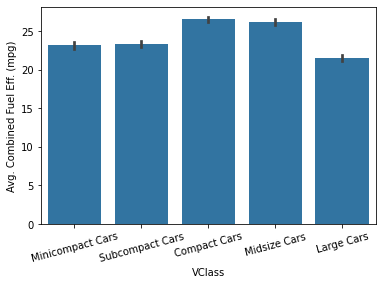

In [59]:
# the black lines on each bar indicates the uncertainty 
# about the mean as a confidence interval
# since we have a lot of data available, 
# the uncertainty whiskers are quite small
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

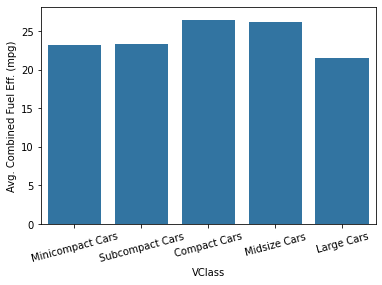

In [60]:
# removing uncertainty whiskers
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

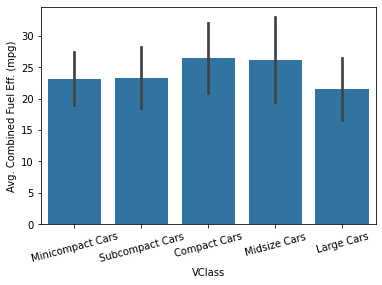

In [61]:
# alternatively, change the bars to represent the 
# standard deviation of data points
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

> Note: `pointplot()` [function](https://seaborn.pydata.org/generated/seaborn.pointplot.html?highlight=pointplot#seaborn.pointplot). 

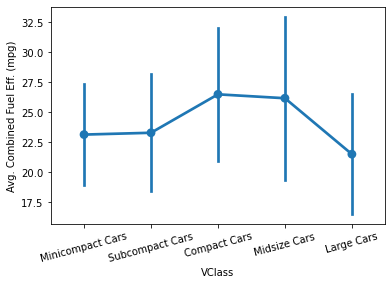

In [62]:
# if having a zero lower bound isn't of interest,
# we can change it as well, using the pointplot function
sns.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

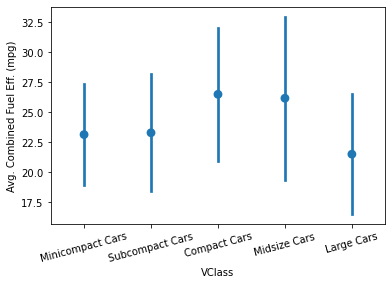

In [63]:
# by default, the points are connected by a line,
# this isn't a problem in this case, since vehicle class
# is ordered from smallest from largest
# but if we were plotting a nominal variable instead,
# we can turn off the line too
sns.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

#### Practice
We've seen multiple ways of representing the relationship between two variables so far. Try plotting a violin plot, a box plot and an adapted bar chart side-by-side.

> Note: `cat.categories()` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cat.categories.html).

In [64]:
xticks = fuel_econ['VClass'].cat.categories
xticks

Index(['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars',
       'Large Cars'],
      dtype='object')

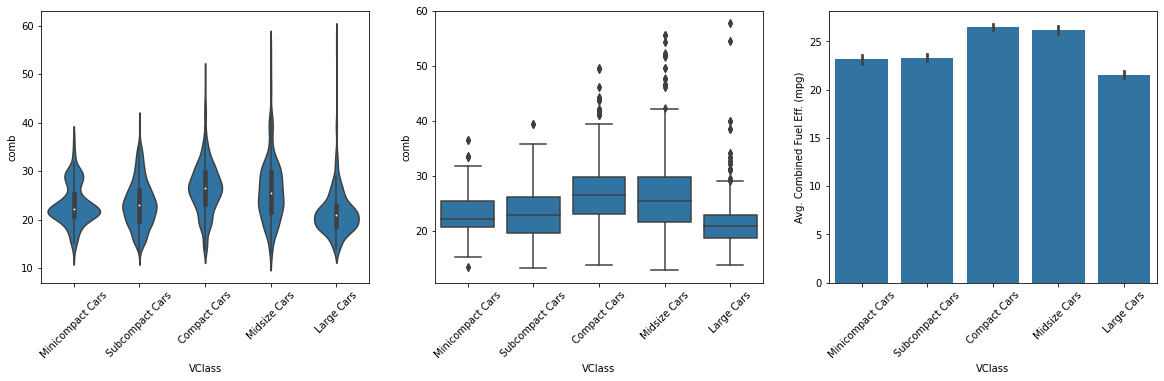

In [65]:
plt.figure(figsize = [20, 5])

# plot 1: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45)

# plot 2: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45)

# plot 3: adapted bar chart
plt.subplot(1, 3, 3)
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

---
## Line Plots
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against the values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

We will use the `plt.errorbar()`[function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to plot line plots.

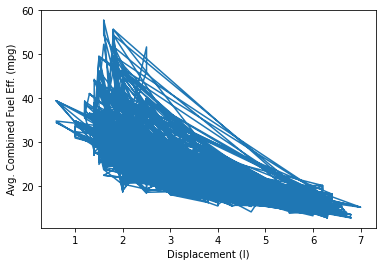

In [66]:
# unfortunately, this plot is uninformative
# all matplotlib is doing is connecting each pair of 
# x and y values in order as they appear in the df without sorting
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

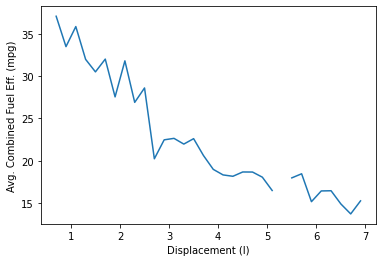

In [67]:
# let's do some work to improve our line plot
# first, set bin edges and centers for
# summarizing the data on the displacement value

bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1 # we need this so that the points are plotted in the accurate position

# next, use pd.cut() to figure out which bin 
# each data point should be used in
# the 1st argument is the sequence I'm slicing,
# the 2nd is the set of bins and
# the 3rd makes sure that the values that are equal to the mean
# get included into the bins
displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest=True)

# then, we use groupby to group by those displacement bins
# and then take the mean of points that fall in each bin
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()

# finally, we're ready to plot again
# there's a gap in the line where there's no data available
plt.errorbar(x=bins_c, y=comb_mean)
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

The plot shows a general decrease in fuel efficiency with engine size.

C:\Users\tharc\anaconda3\envs\dand\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\tharc\anaconda3\envs\dand\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


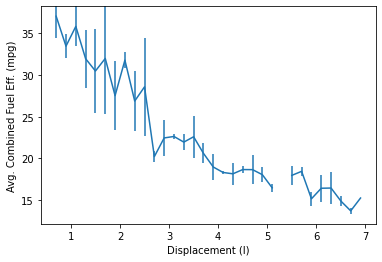

In [68]:
# with the error bar function, we can also compute the std of
# fuel efficiencies in each bin and then plot them through the 
# yerr parameter 
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

plt.errorbar(x=bins_c, y=comb_mean, yerr=comb_std);
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

This plot shows that while the cars with smaller engine sizes have generally higher fuel efficiencies, there's also a lot more variability in those efficiencies. 

### Practice
#### TO DO Task 1:

Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

In [69]:
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic


In [70]:
# first, let's sort by number of cars by each manufacturer
# then, let's keep only those manufacturers with at least
# 80 cars in the dataset
make_counts = fuel_econ['make'].value_counts()
make_counts[make_counts >= 80]

BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
MINI             201
Audi             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: make, dtype: int64

In [71]:
# isolate the indexes (manufacturer name, in this case)
make_counts[make_counts > 80].index

Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'MINI', 'Audi',
       'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda'],
      dtype='object')

In [72]:
# use isin() to create a new dataset containing 
# only those manufacturers with at least 80 cars
# in the dataset
make_over_80 = fuel_econ[fuel_econ['make'].isin(make_counts[make_counts > 80].index)]
make_over_80.sample(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
3811,39571,Lexus,GS 450h,2018,Midsize Cars,Rear-Wheel Drive,Automatic (AV-S8),Premium Gasoline,6,3.5,...,99,29.3324,39.7066,34.1708,44.2615,31.3286,283,7,7,Automatic
2856,37774,Cadillac,XTS AWD,2017,Large Cars,All-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.6,...,104,15.7274,19.5000,23.0453,32.2000,18.3494,486,3,3,Automatic


In [73]:
# check to see if it worked
make_over_80['make'].isin(['Nissan']).sum()

0

In [74]:
# use describe() in the 'comb' column
# to figure out the bins
make_over_80['comb'].describe()

count    3208.000000
mean       25.198091
std         5.956012
min        13.858000
25%        21.000000
50%        24.391000
75%        28.530925
max        57.782400
Name: comb, dtype: float64

In [75]:
# before creating the facetgrid,
# sort manufacturers by average mileage
# and get the indexes (order of manufacturer names)
col_order = make_over_80.groupby('make')['comb'].mean().sort_values(ascending=False).index
col_order

Index(['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI', 'Volkswagen',
       'Chevrolet', 'Ford', 'Lexus', 'Audi', 'BMW', 'Infiniti', 'Dodge',
       'Cadillac', 'Mercedes-Benz', 'Porsche', 'Jaguar'],
      dtype='object', name='make')

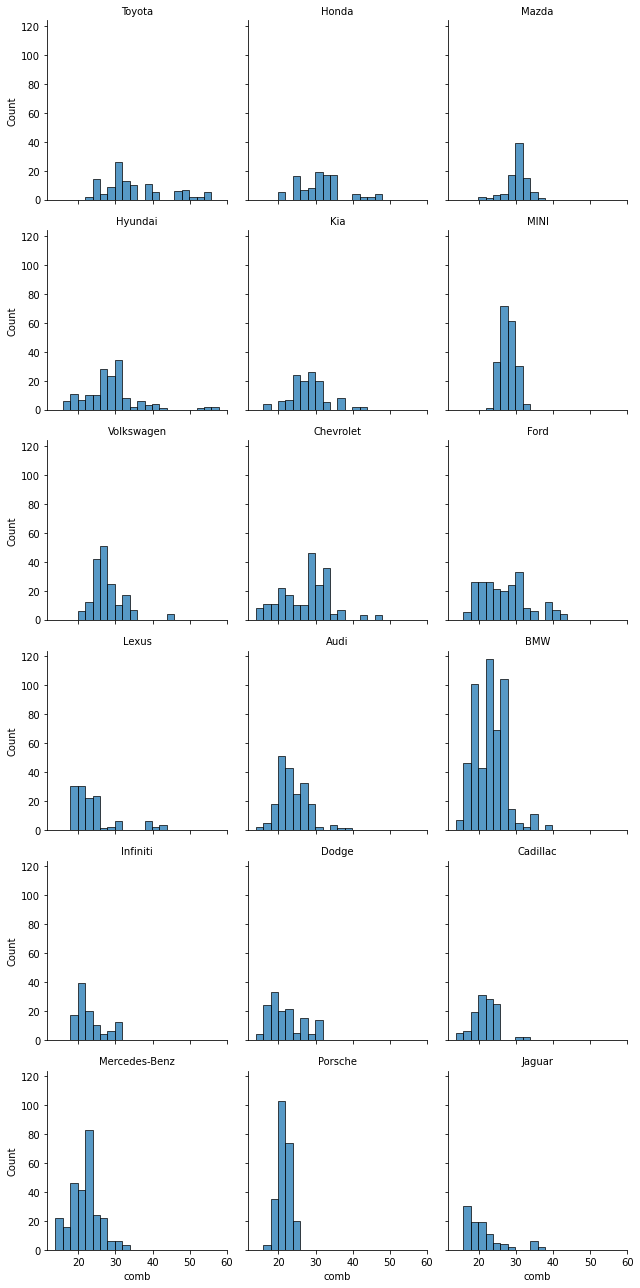

In [76]:
# create the bins with the information from the describe() above
bins = np.arange(make_over_80['comb'].min(), make_over_80['comb'].max()+2, 2)

# create the facegrid using the filtered dataframe 
# based on the column 'make', limiting by 3 columns
# sort the facetgrid by average mileage
g = sns.FacetGrid(data=make_over_80, col='make', col_wrap=3, col_order=col_order)
g.map(sns.histplot, 'comb', bins=bins)
g.set_titles('{col_name}');

One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.

#### TO DO Task 2: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

In [77]:
# find the mean fuel efficiency for each manufacturer
# with at least 80 cars in the dataset
make_over_80.groupby('make')['comb'].mean().sort_values(ascending=False)

make
Toyota           35.184424
Honda            31.588841
Mazda            30.397474
Hyundai          28.793620
Kia              27.843018
MINI             27.807288
Volkswagen       27.769875
Chevrolet        27.224809
Ford             26.796018
Lexus            23.870986
Audi             23.639240
BMW              23.004798
Infiniti         23.002081
Dodge            21.812190
Cadillac         21.773203
Mercedes-Benz    21.765718
Porsche          21.504786
Jaguar           21.429054
Name: comb, dtype: float64

In [78]:
x = make_over_80.groupby('make')['comb'].mean().sort_values(ascending=False).values
y = make_over_80.groupby('make')['comb'].mean().sort_values(ascending=False).index

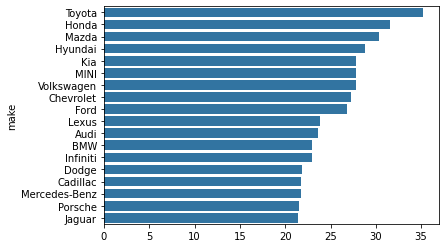

In [79]:
# I could do it like this, but then I'd lose the standard deviation information
sns.barplot(x=x, y=y, color=base_color, ci='sd');

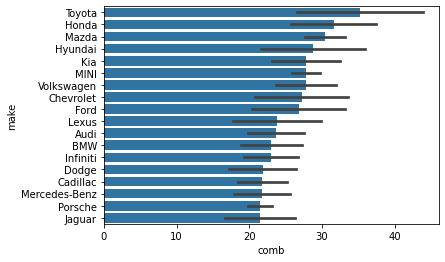

In [80]:
# using the whole dataset is quicker, easier, and more informative
sns.barplot(data=make_over_80, x='comb', y='make', color=base_color, ci='sd', order=col_order);

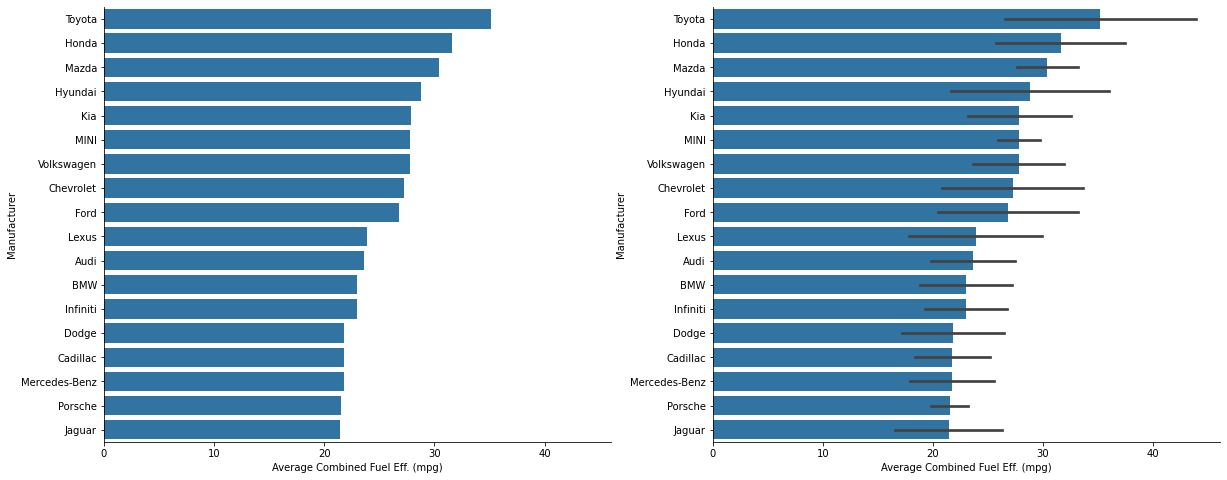

In [81]:
# plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=[20,8], sharex=True)

# plot 1
sns.barplot(ax=axes[0], x=x, y=y, color=base_color, ci='sd')
axes[0].set_xlabel('Average Combined Fuel Eff. (mpg)')
axes[0].set_ylabel('Manufacturer')
axes[0].spines[['top', 'right']].set_visible(False)

# plot 2
sns.barplot(ax=axes[1], data=make_over_80, x='comb', y='make', color=base_color, ci='sd', order=col_order)
axes[1].set_xlabel('Average Combined Fuel Eff. (mpg)')
axes[1].set_ylabel('Manufacturer')
axes[1].grid(visible=False)
axes[1].spines[['top', 'right']].set_visible(False);

Note: [removing](https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame) the boarders of the figure (`spine`).

---
## Summary
In this lesson, you have learned to code the following types of visualizations:

- **scatterplots**: show the relationship between two quantitative variables
- **clustered bar charts**: show the relationship between two qualitative variables
- **heat maps**: used as 2D histograms and bar charts
- **violin and box plots**: show the relationship between one quantitative and one quantitative variable
- **faceting**: adapt univariate plots to bivariate datavariate ex
- **line plots**: show changes in value across time